In [10]:
#If you need to install in modules in jupyter notebook 
# %pip install scikit-learn
# %pip install pandas
# %pip install matplotlib 

#Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
import datetime

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [105]:
#Pull 
df = pd.read_csv('https://raw.githubusercontent.com/Rodrig79/Machine-Learning-Data-Analysis-Project/master/rawData/pokemon.csv')

In [106]:

#Data Cleaning
df = df[~df.Name.str.contains('Mega')] #removed pokemon with "Mega" in it
df = df.drop(columns = ["Name","Type 1","Type 2","#","Generation","Legendary"]) #Removed columns with names

# removing extreme outliers
# statesData = statesData[statesData["cases"].between(statesData["cases"].quantile(.15), statesData["cases"].quantile(.85))]
# statesData = statesData[statesData["deaths"].between(statesData["deaths"].quantile(.15), statesData["deaths"].quantile(.85))]

In [107]:
print(df)

     Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0      318   45      49       49       65       65     45
1      405   60      62       63       80       80     60
2      525   80      82       83      100      100     80
4      309   39      52       43       60       50     65
5      405   58      64       58       80       65     80
..     ...  ...     ...      ...      ...      ...    ...
794    600  108     100      121       81       95     95
795    600   50     100      150      100      150     50
797    600   80     110       60      150      130     70
798    680   80     160       60      170      130     80
799    600   80     110      120      130       90     70

[751 rows x 7 columns]


In [ ]:
# removing extreme outliers
# statesData = statesData[statesData["cases"].between(statesData["cases"].quantile(.15), statesData["cases"].quantile(.85))]
# statesData = statesData[statesData["deaths"].between(statesData["deaths"].quantile(.15), statesData["deaths"].quantile(.85))]



In [ ]:
#changes the output for the print statements
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',0)

min

Total      180
HP           1
Attack       5
Defense      5
Sp. Atk     10
Sp. Def     20
Speed        5
dtype: int64

max

Total      770
HP         255
Attack     180
Defense    230
Sp. Atk    180
Sp. Def    230
Speed      180
dtype: int64

mean

Total      423.322237
HP          68.669774
Attack      75.978695
Defense     71.744341
Sp. Atk     70.213049
Sp. Def     70.109188
Speed       66.607190
dtype: float64

median

Total      430.0
HP          65.0
Attack      75.0
Defense     68.0
Sp. Atk     65.0
Sp. Def     65.0
Speed       65.0
dtype: float64

standard deviation

Total      112.932936
HP          25.946152
Attack      29.920554
Defense     29.629870
Sp. Atk     30.263860
Sp. Def     27.401096
Speed       27.845601
dtype: float64

first quartile

Total      325.0
HP          50.0
Attack      55.0
Defense     50.0
Sp. Atk     45.0
Sp. Def     50.0
Speed       45.0
Name: 0.25, dtype: float64

second quartile

Total      430.0
HP          65.0
Attack      75.0
Defense     

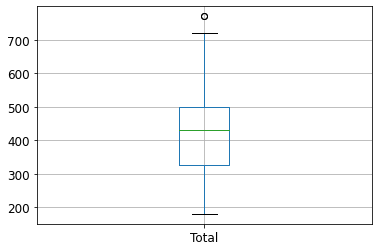

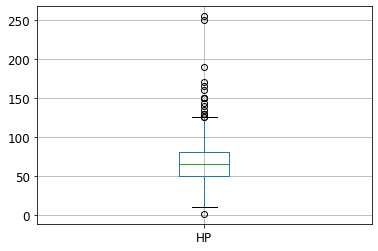

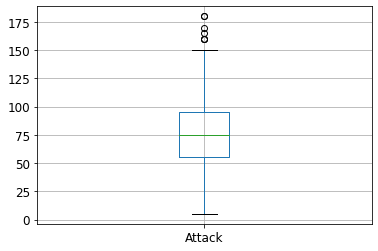

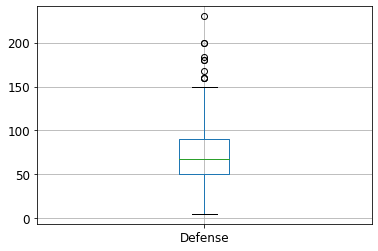

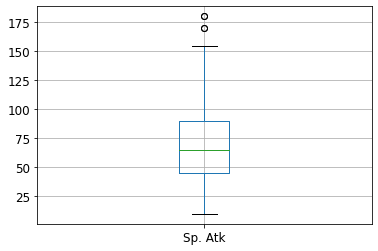

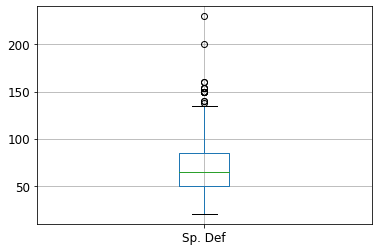

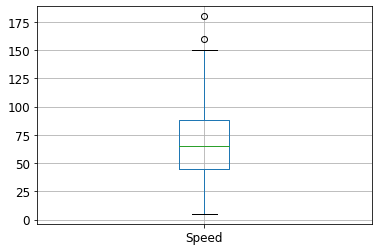

In [108]:
print("min\n")
print(df.min())
print("\nmax\n")
print(df.max())
print("\nmean\n")
print(df.mean(skipna=False))
print("\nmedian\n")
print(df.median())
print("\nstandard deviation\n")
print(df.std())

print("\nfirst quartile\n")
print(df.quantile(0.25))
print("\nsecond quartile\n")
print(df.quantile(0.50))
print("\nthird quartile\n")
print(df.quantile(0.75))
 
boxplot = df.boxplot(column='Total') 
plt.show()
boxplot = df.boxplot(column='HP') 
plt.show()
boxplot = df.boxplot(column='Attack') 
plt.show()
boxplot = df.boxplot(column='Defense') 
plt.show()
boxplot = df.boxplot(column='Sp. Atk') 
plt.show()
boxplot = df.boxplot(column='Sp. Def') 
plt.show()
boxplot = df.boxplot(column='Speed') 
plt.show()

In [ ]:
statesData.dtypes